Beta: [[-61.10880196]
 [  3.17267726]]


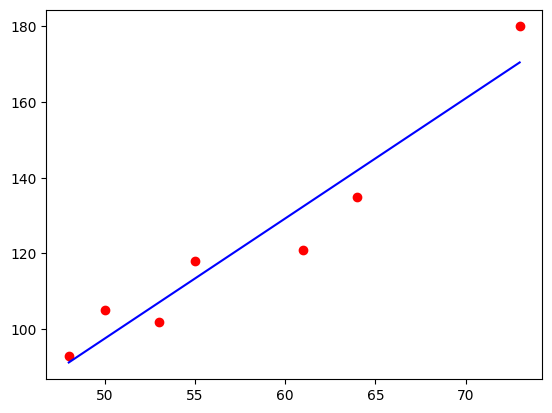

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Q7

H = np.matrix([
    [1, 48],
    [1, 50],
    [1, 53],
    [1, 55],
    [1, 61],
    [1, 64],    
    [1, 73] 
])
W = np.matrix([93, 105, 102, 118, 121, 135, 180])
W = np.matrix_transpose(W)

beta = (np.linalg.inv(np.matrix_transpose(H) * H)) * (np.matrix_transpose(H) * W)
print(f"Beta: {beta}")

data_heights = H[:,1]
data_actual_weight = W[:,0]
# print(data_heights, data_actual_weight)

# Plot the data
plt.scatter([data_heights], [data_actual_weight], color='red')

# Plot the regression line
b0 = beta[0, 0]
b1 = beta[1, 0]
plt.plot(data_heights, b0 + b1 * data_heights, color='blue')

plt.show()


(4, 7)
[[ 1. -3.  9.]
 [ 1. -2.  4.]
 [ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]]
Beta Clean: [[ 1. ]
 [-0.2]
 [ 0.3]]
Beta Noisy: [[ 0.70136667]
 [-0.26433571]
 [ 0.31626905]]


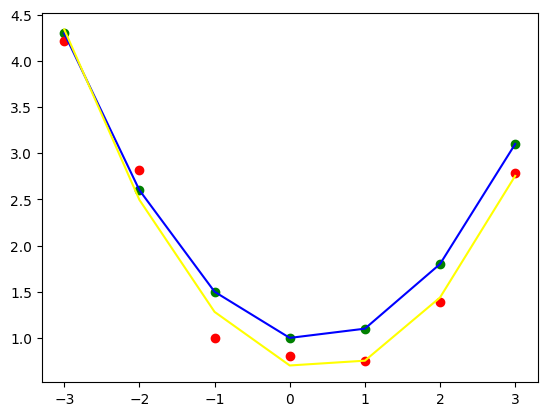

In [102]:
# Q8

noise = np.matrix([
    [-3, 4.3, -0.083, 4.2170],
    [-2, 2.6, 0.2203, 2.8203],
    [-1, 1.5, -0.4999, 1.0001],
    [0, 1, -0.1977, 0.8023],
    [1, 1.1, -0.3532, 0.7468],
    [2, 1.8, -0.4077, 1.3923],    
    [3, 3.1, -0.3137, 2.7863] 
])
noise = np.matrix_transpose(noise)
print(noise.shape)

X_clean = np.zeros([7, 3])
X_clean[:,0] = 1
X_clean[:,1] = noise[0]
X_clean[:,2] = np.multiply(noise[0], noise[0])
print(X_clean)

Y_clean = noise[1]
Y_clean = np.transpose(Y_clean)
XT_X_Inverse = np.linalg.inv(
    np.matmul(np.matrix_transpose(X_clean), X_clean)
) 
XT_Y = np.matmul(np.matrix_transpose(X_clean), Y_clean)
beta_clean = np.matmul(XT_X_Inverse, XT_Y)
print(f"Beta Clean: {beta_clean}")

Y_noisy = noise[3]
Y_noisy = np.transpose(Y_noisy)
XT_X_Inverse = np.linalg.inv(
    np.matmul(np.matrix_transpose(X_clean), X_clean)
) 
XT_Y = np.matmul(np.matrix_transpose(X_clean), Y_noisy)
beta_noisy = np.matmul(XT_X_Inverse, XT_Y)
print(f"Beta Noisy: {beta_noisy}")

# Plot clean
data_x = np.ravel(noise[0])
data_y_clean = np.ravel(noise[1])
plt.scatter([data_x], [data_y_clean], color='green')
b0_clean = beta_clean[0, 0]
b1_clean = beta_clean[1, 0]
b2_clean = beta_clean[2, 0]

plt.plot(data_x, b0_clean + b1_clean * data_x + b2_clean * (data_x * data_x), color='blue')

# Plot noisy
data_y_noisy = np.ravel(noise[3])
plt.scatter([data_x], [data_y_noisy], color='red')
b0_noisy = beta_noisy[0, 0]
b1_noisy = beta_noisy[1, 0]
b2_noisy = beta_noisy[2, 0]
plt.plot(data_x, b0_noisy + b1_noisy * data_x + b2_noisy * (data_x * data_x), color='yellow')

plt.show()